You can find the dataset [here](https://www.kaggle.com/datasets/essasartawi/sentiment-analysis-in-arabic)

# Load the Dataset

In [ ]:
project_path = '/content/drive/MyDrive/Sentiment_Analysis'
data_path = project_path + '/data'
splits_path = data_path + '/splits'
model_path = project_path + '/model'

In [ ]:
import pandas as pd

raw_df = pd.read_csv(data_path + '/data.csv')

pd.set_option('display.max_colwidth', 1000)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162640 entries, 0 to 162639
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   162640 non-null  object
 1   Class   162640 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


**Check NaNs**

In [ ]:
raw_df.isnull().sum()

,0
Tweet,0
Class,0


**Check duplicates**

In [ ]:
raw_df.duplicated("Tweet").sum()

21134

**Sampling**

In [ ]:
raw_df.sample(15)

,Tweet,Class
4900,خمسة نجوم من غير تعليق...,positive
141134,ٲليس من العيب ان تحفظ كل الأغاني .. وتكرر نفس السورة في كل صلاة .. 💔,negative
73686,فندق مقبول . القرب النسبي من محطة المترواالقرب من دبي مولتوفر سيارات الاجرة والمواقف. الواي فاي سيئشاشة التلفزيون صغيرةلم يتم اختيار قنوات مناسبة,neutral
143569,أي كلام مهما قيل فهو قليل جدا بل انه لا يساوي شيء في ميزان أفعال هؤلاء الرجال .. مذكرات عبد الله البرغوثي تنطلق من الخاص إلى العام من تصوير حياة مجاهد قائد لتعطيك الصورة المصغرة عن حياة المجاهدين في فلسطين عبدالله البرغوثي وأمثاله كثير في مسيرة الشعب الفلسطيني عامة وكتائب القسام خاصة . منذ سنوات قرأت مذكرات الأسير القسامي حسن سلامة وكنت أظن أني لن أقرأ مثلها أبدا واليوم أقرأ مذكرات البرغوثي هي شبيهة بأختها من حيث نوعية الرجال وقدراتهم النفسية والقيادية وتمنعهم بوضوح الرؤيا وتصميمهم وثباتهم وصلابتهم . واعتقد الان جازما ان هذه النماذج ستتكرر وتتكرر دون توقف بل اعتقد انها موجودة الان فعلا لكنها لم تظهر الى العلن حتى الان .. في سماء فلسطين نجوم لامعة : عماد عقل، يحي عياش، محمود ابو هنود، يحي حلاوة، محمد ضو.......... واللائحة لا تنتهي لأن الرحلة لا تتوقف هذا ولم نسرد اسماء قيادات سياسية وتنظيمية : الشيخ أحمد ياسين ، عبد العزيز الرنتيسي، صلاح شحادة، سعيد صيام .............. استوقفني في هذه المذكرات عدة أمور :. استعداد عبدالله المبكر والمستمر لخوض المعركة حتى وهو بعيد الاف الأميال عن فلسط...,positive
14268,الغريبه أنها لم تعشجبنى فى البدايه ولا فى منتصفها ولكن مع نهايتها وبعيقريه فريده للكاتب أحسست أنها ليست سيئه بل وجيده كقصه اجتماعيه بأسلوب جديد أى أن القصه كالخمر مر عند تناوله ولكن يسكر بعد قليل,negative
119632,أكثر كتابات احلام غرابة. فى بعض الاحيان تكون فى القمه خصوصا فى البداية والنهاية. بينما فى المنتصف قصائد خالية الروح لا تشعر بادنى ذرة من روح أحلام بها. تعملقت أحلام وكانت فى ابهى صورها فى قصيدة وجبة حب باردة خاصة ذلك المقطع. اعتذرنا لبعضنا. لأننا أخذنا من وقت بعضنا الكثير. ثحدثنا وجاملنا بعضنا. بوقت إضافي للكذب. كذبنا على بعضنا بصدق مدهش. وكنا صادقين لاقصى حدود الكذب. فهل عجب ألا يبقى مما قلناه .. شيء .. . وضعنا قليلا من الثلج في كأس حبنا. وضعنا قليلا من التهذيب في كلماتنا. وضعنا جنوننا في جيوبنا. وشوقنا في حقيبة يدنا. لبسنا البدلة التي ليس ليا ذكرى. وعلقنا الماضي مع معطفنا عمى المشجب. فهل عجب.. أن يمر الحب دون أن يتعرف علينا . وأيضا فى قصيدة الحب المضاد. كل شيء ضدنا. ونحن ضد أنفسنا. نحاول أن نصالح الحب مع الكبرياء. والعشق مع العناد. والجنون مع المنطق. نحاول .. أن نصالح عقلنا مع قلبنا. وقلبنا مع وضعنا. ووضعنا.. مع شرعية الأحلام .. . كل شيء مستحيل. والممكن ما عاد ممكنا. فلم. على ناصية الوهم وقفنا. نفاضل بيف مستحيل .. ومستحيل . ومازلنا بيف شك .. وشك. نضارب على بعضنا البعض. نزايد على ...,neutral
107613,"🍃 أنا لو أوجعتك ب الكلام ؟ 🥀 عمري م خنتك بالشعور .!♥️ ""ⓢ""🦋♪",negative
154362,الاقرب للحرم . قربه من الحرم بشاشة ولطف موظفي الاستقبال السعوديين وحسن تعاملهم. عدم الاهتمام بنظافة الغرفه حيث يوجد الكثير من اثار بقايا الطعام بجوار سلة المهملات وكذلك ضيق الحمام .سعر ايجار مواقف السيارات مبالغ فيه خيث يمثل من قيمة ايجار الغرفه,positive
23837,لابد من التعديل . . لا يوجد خدمة طلب الاكل من مطعم الفندق للغرف لا يوجد بالغرف مايكروويفوقت الخروج نطلب اثناء الحجز وقت معين ويتم اخراجنا قبل هذا الوقت المغسله تتاخر في الملابس,neutral
16605,مع انى عديت مرحلة المراهقين دى من فترة او هكذا اعتقد : لكن استمتعت بخفة دم عمر طاهر و ببعض افكارة المجنونة جدا و المنطقية جدا فى نفس الوقت. استمتعت بدقة الندالة اللى عملها مع قرايبة و حكى ادق اسرار طفولتهم فى كتاب. الندالة فن فعلا. لو محتاج كتاب تفصل بيه عن القرف اللى حوالينا فى كل مكان فالكتاب ده مناسب جدا,neutral


**Check dataset balancing**

In [ ]:
value_counts=raw_df['Class'].value_counts()
value_counts

,count
Class,
negative,63811
positive,61846
neutral,36983


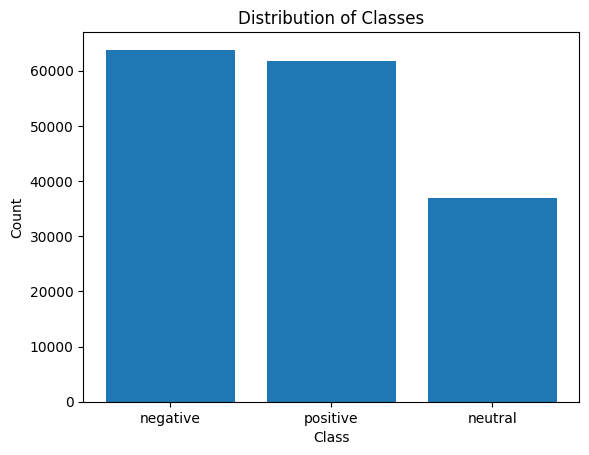

In [ ]:
# make a visualization
import matplotlib.pyplot as plt

# Create bar plot
plt.bar(value_counts.index, value_counts.values)
# Add title and labels
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

# Data Preprocessing

## Helper functions

In [ ]:
# Import nltk for Arabic stopwords
import nltk
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')
# Get the unique stopwords
stop_words = set(stopwords.words('arabic'))

In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

raw_text = " في نلعب هيا بنا"
preprocessed_text = remove_stopwords(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

In [ ]:
import re

In [ ]:
def remove_usernames(text):
    clean_text = re.sub(r'@\w+', '', text)
    return clean_text

raw_text = "@baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂"
preprocessed_text = remove_usernames(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: @baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂
After :  مسا مسا اهو انت 😂😂😂


In [ ]:
def remove_numbers(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

raw_text = "٣٣ هاي"
preprocessed_text = remove_numbers(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: ٣٣ هاي
After :  هاي


In [ ]:
def remove_links(text):
    URL_REGEXES = [
        r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)",
        r"@(https?|ftp)://(-\.)?([^\s/?\.#-]+\.?)+(/[^\s]*)?$@iS",
        r"http[s]?://[a-zA-Z0-9_\-./~\?=%&]+",
        r"www[a-zA-Z0-9_\-?=%&/.~]+",
        r"[a-zA-Z]+\.com",
        r"(?=http)[^\s]+",
        r"(?=www)[^\s]+",
        r"://",
    ]

    for reg in URL_REGEXES:
        text = re.sub(reg, '', text)
    return text

raw_text = "النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا https://t.co/6lmlpseLk4	www.google.com"
preprocessed_text = remove_links(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا https://t.co/6lmlpseLk4	www.google.com
After : النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا 	


In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                            ّ    | # Tashdid
                            َ    | # Fatha
                            ً    | # Tanwin Fath
                            ُ    | # Damma
                            ٌ    | # Tanwin Damm
                            ِ    | # Kasra
                            ٍ    | # Tanwin Kasr
                            ْ    | # Sukun
                            ـ    | # Tatwil/Kashida
                        """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

raw_text = "الــبسملة : ( بِسْمِ اللَّـهِ الرَّحْمَـٰنِ الرَّحِيمِ )"
preprocessed_text = remove_diacritics(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: الــبسملة : ( بِسْمِ اللَّـهِ الرَّحْمَـٰنِ الرَّحِيمِ )
After : البسملة : ( بسم الله الرحمٰن الرحيم )


In [ ]:
def normalize_chars(text):
    preprocessed_text = re.sub("[إأآا]", "ا", text)
    preprocessed_text = re.sub("ى", "ي", preprocessed_text)
    preprocessed_text = re.sub("ؤ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ئ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ة", "ه", preprocessed_text)
    preprocessed_text = re.sub("گ", "ك", preprocessed_text)
    preprocessed_text = re.sub("ڤ", "ف", preprocessed_text)
    preprocessed_text = re.sub("چ", "ج", preprocessed_text)
    preprocessed_text = re.sub("ژ", "ز", preprocessed_text)
    preprocessed_text = re.sub("پ", "ب", preprocessed_text)
    preprocessed_text = re.sub("&quot;", " ", preprocessed_text)
    # preprocessed_text = re.sub("?", " ? ", preprocessed_text)
    preprocessed_text = re.sub("؟", " ? ", preprocessed_text)
    preprocessed_text = re.sub("¿", " ¿ ", preprocessed_text)
    preprocessed_text = re.sub("!", " ! ", preprocessed_text)
    preprocessed_text = re.sub("@", " ", preprocessed_text)
    preprocessed_text = re.sub("#", " ", preprocessed_text)
    preprocessed_text = re.sub("،", " ", preprocessed_text)
    preprocessed_text = re.sub("ـ", " ", preprocessed_text)
    preprocessed_text = re.sub("؛", " ", preprocessed_text)
    preprocessed_text = re.sub(":", " ", preprocessed_text)
    preprocessed_text = re.sub("'", " ", preprocessed_text)
    preprocessed_text = re.sub("‘", " ", preprocessed_text)
    preprocessed_text = re.sub("’", " ", preprocessed_text)
    preprocessed_text = re.sub("“", " ", preprocessed_text)
    preprocessed_text = re.sub("”", " ", preprocessed_text)
    preprocessed_text = re.sub("-", " ", preprocessed_text)
    preprocessed_text = re.sub("=", " ", preprocessed_text)
    preprocessed_text = re.sub("_", " ", preprocessed_text)
    preprocessed_text = re.sub("\)", " ", preprocessed_text)
    preprocessed_text = re.sub("\(", " ", preprocessed_text)
    preprocessed_text = re.sub("\[", " ", preprocessed_text)
    preprocessed_text = re.sub("\]", " ", preprocessed_text)
    preprocessed_text = re.sub("{", " ", preprocessed_text)
    preprocessed_text = re.sub("}", " ", preprocessed_text)
    preprocessed_text = re.sub("~", " ", preprocessed_text)
    preprocessed_text = re.sub("`", " ", preprocessed_text)
    preprocessed_text = re.sub("«", " ", preprocessed_text)
    preprocessed_text = re.sub("»", " ", preprocessed_text)

    return preprocessed_text

raw_text = "ى آ ؤ ئ هيا"
preprocessed_text = normalize_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: ى آ ؤ ئ هيا
After : ي ا ء ء هيا


In [ ]:
def remove_repeated_chars(text):
    pattern = re.compile(r"(.)\1{2,}")
    clean_text = pattern.sub(r"\1\1", text)
    return clean_text

raw_text = " اللللي بتااااااااااااااع  اللله اناااااااا "
preprocessed_text = remove_repeated_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  اللللي بتااااااااااااااع  اللله اناااااااا 
After :  اللي بتااع  الله اناا 


In [ ]:
def remove_extra_whitespaces(text):
    clean_text = re.sub(r'\s+', ' ', text)
    return clean_text.strip()

raw_text = "السلام عليكم    علـيـكم   "
preprocessed_text = remove_extra_whitespaces(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: السلام عليكم    علـيـكم   
After : السلام عليكم علـيـكم


## Apply Preprocessing steps:

1. stop words 'include tashkeel and diacritics'

2. emojis 'before numbers', numbers, usernames : 'independent'

3. urls : 'dependent on english chars


4. english words, remove_diacritics, tashkeel

5. remove_special_chars, punctuation

6. whitespaces -> last thing

In [ ]:
def preprocessing(text):

    #lower case
    text = text.lower()

    #user_names
    text = remove_usernames(text)

    #numbers
    text = remove_numbers(text)

    #links
    text = remove_links(text)

    #tashkel
    text = remove_diacritics(text)

    #normalizeChars
    text = normalize_chars(text)

    #repeated charachters
    text = remove_repeated_chars(text)

    #white_space
    text = remove_extra_whitespaces(text)

    return text

In [ ]:
# Make a copy from the dataframe
df = raw_df.copy()

In [ ]:
# Apply the preprocessing on all the text in the dataset
df['Tweet'] = df['Tweet'].apply(preprocessing)

In [ ]:
# see a sample from the processed dataframe
df.sample(50)

,Tweet,Class
28634,نفس خبر جبران باسيل شفلي مرق علي هيدا الموقع شي,neutral
111554,الاهلي الهلال اكتب توقعك لنتيجه لقاء الهلال والاهلي تحت التاق 👇 تحدي اسرع روقان وادخل في سحب قيمه ايفون x علي…,negative
43539,لما خلصت الكتاب .. سءلت نفسي سءال .. هو عبقريه الكتاب تتمثل في انه مكتوب من قرن ومواكب للحاضر. ولا احنا اللي لسه عايشين في القرن اللي فات ? |,neutral
73626,نسيت احداث الروايه .. علي ان اقراها مجددا,neutral
9473,ضعيف. الفراش مريح. الاطلاله سيءهالفوط ريحتهم لحمخدمه المطعم تعبانه و الطاقم سيءالتكلفه عاليه جدا مقابل المعطيلما تخلص لازم تمشي مع جناطك كيلو بره الشارع عشان تحصل تاكسيالغرفه صغيره حيل,negative
83354,كتاب جميل. لكنه ليس بمستوي الحدث والفاجعه.. كربلاء نقطه مفصليه خطيره في التاريخ الاسلامي.. تحتاج الي تحليل عميق لسبر اغوارها.. الاحداث التي ادت الي كربلاء موغله في ماقبل البعثه النبويه وجاءت النبوه فاضافت اسبابا واحيت احقادا ثم السقيفه ثم خلافه عثمان ثم الجمل وصفين.. ومابين ذلك كله نفسيات وامال ورغبات وغايات وعقاءد.. ثم الاثار المترتبه علي كربلاء دينيا وسياسيا واجتماعيا وثقافيا والنتاءج التي اصبحت اسبابا لاحداث اخري. الشخصيات التي صنعت كربلاء الحسين واهل بيته وانصاره يزيد وابن زياد وعمر بن سعد وجميع الشخصيات التي شاركت في الحدث او عاصرته مثل ابن الزبير وابن عباس وابن عمر وغيرهم من الشخصيات المرموقه كل واحد من اولءك يحتاج لوقفه من المءرخ ليست بالقصيره . تطبيق النظريه التسانديه ضروري عند الكتابه عن حدث اقل اثرا من معركه كربلاء فما بالك بكربلاء . وحري بمن يتصدي للكتابه عن كربلاء ان يقف ويطيل الوقوف عند دراسته لطبيعه وتركيبه المجتمع الذي كان حينها يسكن العراق. دون اغفال لرده فعل المجتمع الاسلامي من عدمه نتيجه هذا الانتهاك.. العقاد وهو القامه السامقه في الثقافه العربيه والشجره الوارفه ا...,neutral
2480,عز الدين شكري يري الواقع المرير بنظره واقعيه صادقه الثلاث نجوم لاخر صفحتين في الروايه لماذا عاد الي مصر ? في كب اجابه قالها حقيقه مءلمه لماذا نعود ونحن نعلم اننا اصبحنا بلا مكان ? لماذا قد نتخلي عن عيشه كريمه لنصبح مجرد حطام . استمتعت بها رغم الملل الذي اصابني في بعض الاوقات لكنها جديده بالنسبه لي احببت فلسفه الكاتب و طريقه صياغته للاحداث,neutral
139789,الفندق قديم جدا ولا نصح السكن فيه والاسعار غاليه جدا . لا شي. الاسعار .الاثاث قديم .الخدمات سيه جدا,neutral
42983,ممتازه . متصل مع الامارات مول . خدمه الخروج كانت سيءه,positive
15770,كل ما سمعت قصه عن .. النبي محمد صلي الله عليه و سلم تمنيت لو انه عايش بيننا 💔,negative


**Check Again**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162640 entries, 0 to 162639
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   162640 non-null  object
 1   Class   162640 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [ ]:
df.isnull().sum()

,0
Tweet,0
Class,0


In [ ]:
df.duplicated("Tweet").sum()

21259

In [ ]:
df = df.drop_duplicates(subset="Tweet")

In [ ]:
df.duplicated("Tweet").sum()

0

In [ ]:
len(df)

141381

## check the length distrebution

In [ ]:
df['Tweet_length'] = df['Tweet'].apply(lambda x: len(str(x).split()))

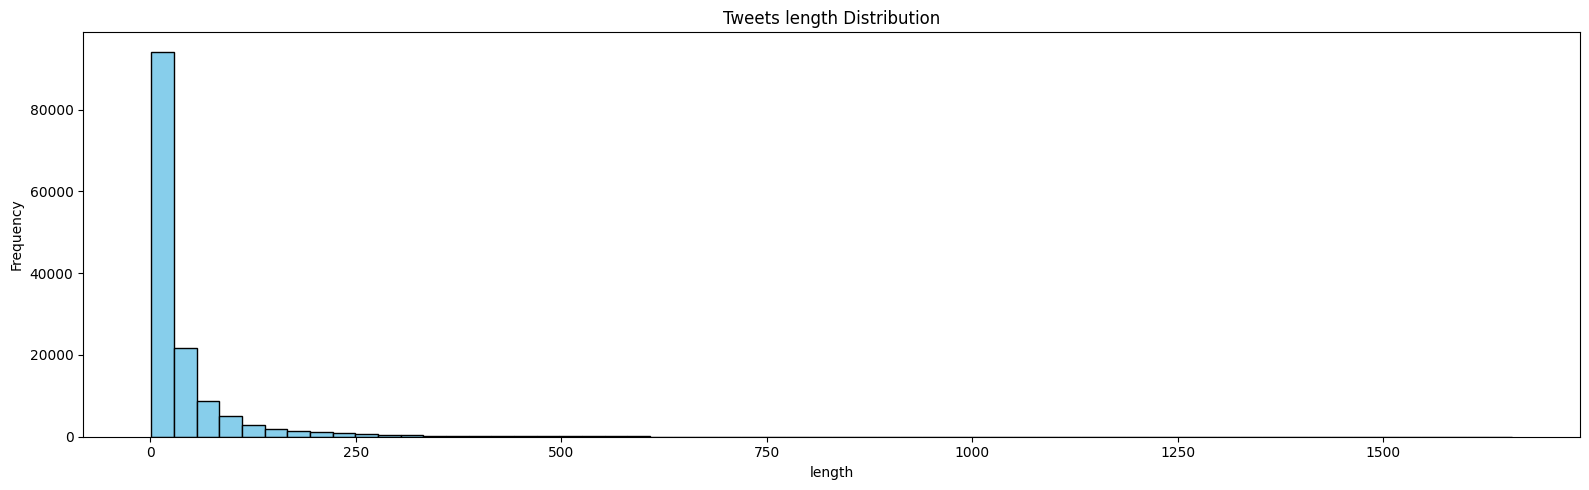

In [ ]:
plt.figure(figsize=(16, 5))
plt.hist(df['Tweet_length'], bins=60, color='skyblue', edgecolor='black')
plt.title('Tweets length Distribution')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
def truncate_tweet(text, word_limit=30):
    words = text.split()
    if len(words) > word_limit:
        return ' '.join(words[:word_limit])
    else:
        return text

# Apply the truncate_tweet function to each row in the 'tweet' column
df['Tweet'] = df['Tweet'].apply(lambda x: truncate_tweet(x, word_limit=30))

In [ ]:
df['Tweet_length'] = df['Tweet'].apply(lambda x: len(str(x).split()))

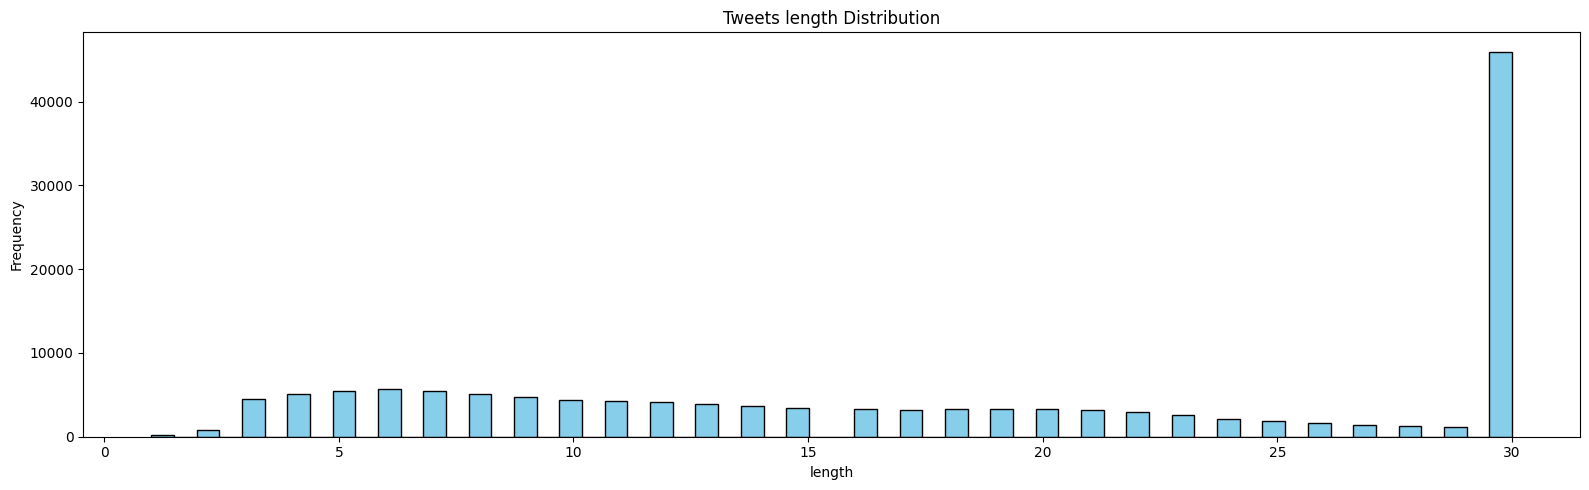

In [ ]:
plt.figure(figsize=(16, 5))
plt.hist(df['Tweet_length'], bins=60, color='skyblue', edgecolor='black')
plt.title('Tweets length Distribution')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
len(df)

141381

In [ ]:
df

,Tweet,Class,Tweet_length
0,من اسوء الكتب الي ممكن تقراها,negative,6
1,تكفي حس فيني شوي قول قلبك هذا لي ياغلي من روحي علي طالبك انا ابيك,negative,15
2,مستوي خدمه ممتاز . الاستقبال. لاشي,positive,6
3,🌸 وما لي غير رب العرش يکفيني عن شر خلقه ويقيني من شر الحاسدين ويکفيني…,positive,15
4,للتصحيح تم يجيلك احلي ايفون بس اهم شي انك ترضي بالايفون اللي راح يجيك 😌,positive,15
...,...,...,...
162634,كويسه و فيها شويه رسايل في الجون بس اوفر .. اوفر اوي .. اوي اوي,neutral,15
162635,ايش موقف امه لما شافت .. والله لو مكانها بتجيلي جلطه 😰,negative,12
162636,مرضي. الفندق في منطقه تجاريه وقريب من الخور النظافه والخدمات مقبوله وجيده لمن يرغب في التسوق الفندق موقعه ممتاز. لا يصلح للعواءل اطلاقا لا يوجد مواقف مجانيه ويوجد مبني مواقف,neutral,30
162637,ربنا يسمحك بقي علي الروايه دي كانت في طريقها الي ال نجوم في الجزء الاول وبدات المفاجاه في الفصل الثاني كانها روايه منفصله تماما احداث مختلفه شخصيات مبهمه وصف اوفر,negative,30


## Organizing

In [ ]:
# Rename the 'Tweet' column to 'text' and 'Class' column to 'label_name'
df.rename(columns={'Tweet': 'text', 'Class': 'label_name'}, inplace=True)

# Drop the 'Tweet_length' column
df.drop(columns=['Tweet_length'], inplace=True)

# Map the 'label_name' values to numbers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['label_name'].map(label_mapping)

In [ ]:
df

,text,label_name,label
0,من اسوء الكتب الي ممكن تقراها,negative,0
1,تكفي حس فيني شوي قول قلبك هذا لي ياغلي من روحي علي طالبك انا ابيك,negative,0
2,مستوي خدمه ممتاز . الاستقبال. لاشي,positive,2
3,🌸 وما لي غير رب العرش يکفيني عن شر خلقه ويقيني من شر الحاسدين ويکفيني…,positive,2
4,للتصحيح تم يجيلك احلي ايفون بس اهم شي انك ترضي بالايفون اللي راح يجيك 😌,positive,2
...,...,...,...
162634,كويسه و فيها شويه رسايل في الجون بس اوفر .. اوفر اوي .. اوي اوي,neutral,1
162635,ايش موقف امه لما شافت .. والله لو مكانها بتجيلي جلطه 😰,negative,0
162636,مرضي. الفندق في منطقه تجاريه وقريب من الخور النظافه والخدمات مقبوله وجيده لمن يرغب في التسوق الفندق موقعه ممتاز. لا يصلح للعواءل اطلاقا لا يوجد مواقف مجانيه ويوجد مبني مواقف,neutral,1
162637,ربنا يسمحك بقي علي الروايه دي كانت في طريقها الي ال نجوم في الجزء الاول وبدات المفاجاه في الفصل الثاني كانها روايه منفصله تماما احداث مختلفه شخصيات مبهمه وصف اوفر,negative,0


## Saving the processed data

In [ ]:
# save the processed dataset
df.to_csv(data_path + '/processed_dataset.csv', index=False)

# Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv(data_path + '/processed_dataset.csv')
df.shape

(141381, 3)

In [ ]:
# Split data into train, validation, and test (90:5:5)

train_df, temp_df = train_test_split(df, test_size=0.1, stratify=df['label'], random_state=42, shuffle=True)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42, shuffle=True)

In [ ]:
print("Train set shape:", train_df.shape)
print("Validation set shape:", valid_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (127242, 3)
Validation set shape: (7069, 3)
Test set shape: (7070, 3)


In [ ]:
train_df

,text,label_name,label
124879,مش لاقي فرق كبير بينها و بين نادي السيارات لعل...,negative,0
78630,ممتاز قريب من المطار وبعيد عن الازدحام . تعامل...,positive,2
138302,حنين / . اسميتها نانا واسرار الجامعه و لم اكن ...,neutral,1
136095,لعب كتير ع المسافه الفاصله بين السخريه و التفا...,neutral,1
35076,مرضي. القرب من الحرم. قل الاهتمام بالنزيل وكذل...,neutral,1
...,...,...,...
30583,مءسف . . البط في التجاوبسو الصيانه/ ابواب / حم...,negative,0
98259,العمي شو انكن عبيد,negative,0
101341,اكره التكلف في الالفاظ والعبارات التعبيرات الب...,negative,0
124227,مخيب للامل. . اتساخ المفارش الاضافيه والفرش,negative,0


**checking the distrebutions**

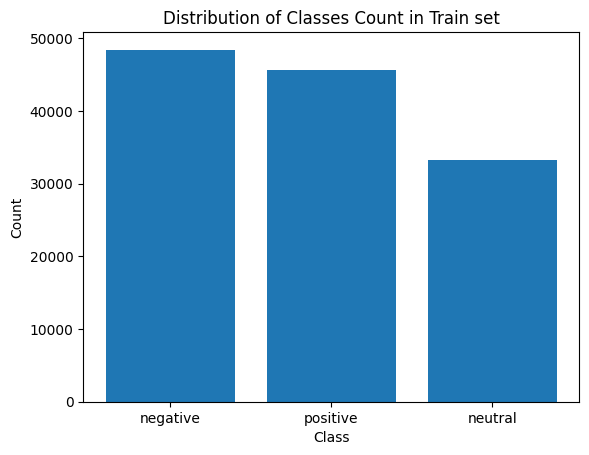

In [ ]:
# make a visualization
import matplotlib.pyplot as plt

class_counts = train_df['label_name'].value_counts()

# Create bar plot
plt.bar(class_counts.index, class_counts.values)
# Add title and labels
plt.title('Distribution of Classes Count in Train set')
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

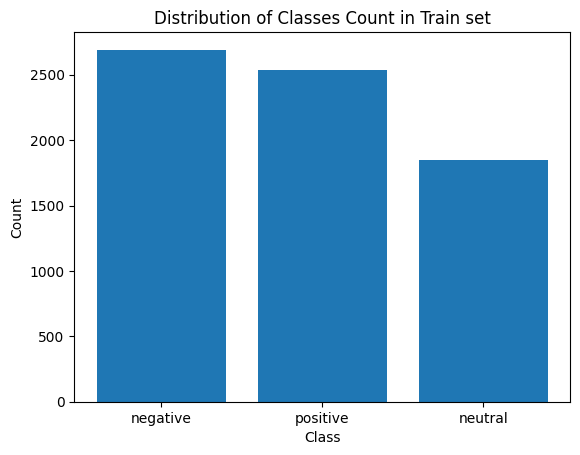

In [ ]:
class_counts = valid_df['label_name'].value_counts()

# Create bar plot
plt.bar(class_counts.index, class_counts.values)
# Add title and labels
plt.title('Distribution of Classes Count in Train set')
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

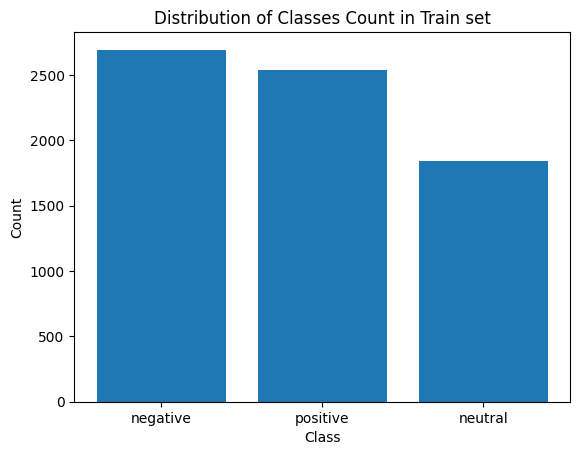

In [ ]:
class_counts = test_df['label_name'].value_counts()

# Create bar plot
plt.bar(class_counts.index, class_counts.values)
# Add title and labels
plt.title('Distribution of Classes Count in Train set')
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

**Saving the sets**

In [ ]:
# Save the sets to CSV files
train_df.to_csv(splits_path +'/train_data.csv', index=False)
valid_df.to_csv(splits_path +'/valid_data.csv', index=False)
test_df.to_csv(splits_path +'/test_data.csv', index=False)

# Model Training

In [ ]:
import transformers

print(transformers.__version__)

4.42.4


In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


## loading the sets

In [ ]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={
    'train': splits_path + '/train_data.csv',
    'valid': splits_path + '/valid_data.csv',
    'test': splits_path + '/test_data.csv'

})

Generating train split: 0 examples [00:00, ? examples/s]

Generating valid split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label_name', 'label'],
        num_rows: 127242
    })
    valid: Dataset({
        features: ['text', 'label_name', 'label'],
        num_rows: 7069
    })
    test: Dataset({
        features: ['text', 'label_name', 'label'],
        num_rows: 7070
    })
})

In [ ]:
# Drop 'label_name' column from all splits
dataset = dataset.remove_columns(['label_name'])

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 127242
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 7069
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7070
    })
})

## Preprocessing the data (Tokenization)

You can find the model used [here](https://huggingface.co/PRAli22/AraBert-Arabic-Sentiment-Analysis)

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'PRAli22/AraBert-Arabic-Sentiment-Analysis'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, max_length=64)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/751k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.77M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

In [ ]:
tokenizer("انا الحمدلله بخير")

{'input_ids': [2, 6728, 6620, 45541, 15972, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
def tokenize_function(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True, max_length=64)

In [ ]:
# Apply the function to the dataset

tokenized_train_dataset = dataset['train'].map(tokenize_function, batched=True)
tokenized_val_dataset = dataset['valid'].map(tokenize_function, batched=True)
tokenized_test_dataset = dataset['test'].map(tokenize_function, batched=True)

Map:   0%|          | 0/127242 [00:00<?, ? examples/s]

Map:   0%|          | 0/7069 [00:00<?, ? examples/s]

Map:   0%|          | 0/7070 [00:00<?, ? examples/s]

## Model Defining

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('PRAli22/AraBert-Arabic-Sentiment-Analysis', num_labels=3, ignore_mismatched_sizes=True)

config.json:   0%|          | 0.00/941 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at PRAli22/AraBert-Arabic-Sentiment-Analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([4]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([4, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.
    """
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir= model_path + "/finetuning-ArabicSenti-model",
    num_train_epochs=3,  # Start with a lower number and adjust as needed
    learning_rate=3e-5,  # Adjust based on initial results
    per_device_eval_batch_size=64,  # Adjust based on memory constraints
    per_device_train_batch_size=32,  # Adjust based on memory constraints
    weight_decay=0.1,
    eval_strategy="epoch",  # Use "epoch" or "steps"
    save_strategy="epoch",  # Matching the eval_strategy
    load_best_model_at_end=True,  # Ensures the best model is saved
    disable_tqdm= False,
    push_to_hub=False
    # warmup_steps=500  # Gradual increase in learning rate
  )

## Training

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = tokenized_train_dataset,
    eval_dataset = tokenized_val_dataset,
    tokenizer = tokenizer
)

In [ ]:
%%time
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.509700,0.514077,0.769274,0.746912,0.757819,0.745650
2,0.429900,0.513116,0.778328,0.766007,0.766281,0.766072
3,0.325400,0.570338,0.781299,0.768443,0.768681,0.768349


CPU times: user 1h 9min 53s, sys: 25.2 s, total: 1h 10min 18s
Wall time: 1h 14min 6s


TrainOutput(global_step=11931, training_loss=0.4340342546526479, metrics={'train_runtime': 4445.8416, 'train_samples_per_second': 85.861, 'train_steps_per_second': 2.684, 'total_flos': 1.2554654061954816e+16, 'train_loss': 0.4340342546526479, 'epoch': 3.0})

## Testing the model

In [ ]:
def predict(text):

  # Ensure the model is on the same device as the inputs
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Move the model to the correct device
  model.to(device)

  # Tokenize the input text and move the inputs to the correct device
  inputs = tokenizer(text, padding=True, truncation=True, max_length=64, return_tensors="pt").to(device)

  # Get model output (logits)
  outputs = model(**inputs)

  # Calculate probabilities and prediction label index
  probs = outputs[0].softmax(1)
  pred_label_idx = probs.argmax()

  # Map index to class label
  idx2class = {0: 'negative', 1: 'neutral', 2: 'positive'}
  pred_label = idx2class[pred_label_idx.item()]

  return probs, pred_label_idx, pred_label

In [ ]:
text = "ايه الكلام انهرده ؟ شغال ولا ايه ؟!"

predict(text)

(tensor([[0.8659, 0.0064, 0.1277]], device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(0, device='cuda:0'),
 'negative')

In [ ]:
import torch
print(torch.__version__)

2.4.0+cu121


## Saving

In [ ]:
# Saving The Model
trainer.save_model(model_path + '/BertTranformer_model')

In [ ]:
# Saving the Tokenizer
tokenizer.save_pretrained(model_path + '/BertTranformer_tokenizer')

('/content/drive/MyDrive/Sentiment_Analysis/model/BertTranformer_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Sentiment_Analysis/model/BertTranformer_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Sentiment_Analysis/model/BertTranformer_tokenizer/vocab.txt',
 '/content/drive/MyDrive/Sentiment_Analysis/model/BertTranformer_tokenizer/added_tokens.json',
 '/content/drive/MyDrive/Sentiment_Analysis/model/BertTranformer_tokenizer/tokenizer.json')

# Model evaluation

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

# Set the model to evaluation mode
model.eval()

# Prepare the test dataset for PyTorch DataLoader
tokenized_test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_loader = DataLoader(tokenized_test_dataset, batch_size=16, shuffle=False)

# Initialize lists to collect true labels and predictions
true_labels = []
predictions = []

# Evaluation loop
with torch.no_grad():
    for batch in test_loader:
        # Move inputs and labels to the same device as the model
        inputs = {k: v.to(model.device) for k, v in batch.items() if k in ['input_ids', 'attention_mask']}
        labels = batch['label'].to(model.device)

        # Get model outputs and predict labels
        outputs = model(**inputs)
        pred_labels = torch.argmax(outputs.logits, dim=-1)

        # Store results for later evaluation
        predictions.extend(pred_labels.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Print the classification report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(true_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      2692
     neutral       0.65      0.68      0.66      1844
    positive       0.84      0.81      0.83      2534

    accuracy                           0.79      7070
   macro avg       0.78      0.78      0.77      7070
weighted avg       0.79      0.79      0.79      7070



# Quantization

for more info take a look [here](https://github.com/huggingface/optimum-quanto)

In [ ]:
!pip install quanto==0.0.11

In [ ]:
import importlib
import helper
importlib.reload(helper)
from helper import compute_module_sizes

**Before Quantization**

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_checkpoint = model_path + "/BertTranformer_model"
big_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
module_sizes = compute_module_sizes(big_model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

The model size is 0.540790796 GB


**After Quantization**

In [ ]:
from quanto import quantize, freeze
import torch

quantize(big_model, weights=torch.int8, activations=None)

In [ ]:
freeze(big_model)

In [ ]:
module_sizes = compute_module_sizes(big_model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

The model size is 0.284545896 GB
